In [1]:
import random

# Datos del brazo izquierdo en reposo
data_izq_reposo = """
# OpenSignals Text File Format. Version 1
# {"84:BA:20:5E:FF:7F": {"position": 0, "device": "bitalino_rev", "device name": "84:BA:20:5E:FF:7F", "device connection": "BTH84:BA:20:5E:FF:7F", "sampling rate": 100, "resolution": [4, 1, 1, 1, 1, 10], "firmware version": 1282, "comments": "", "keywords": "", "mode": 0, "sync interval": 2, "date": "2024-3-6", "time": "18:51:36.613", "channels": [1], "sensor": ["EMGBITREV"], "label": ["A1"], "column": ["nSeq", "I1", "I2", "O1", "O2", "A1"], "special": [{}], "digital IO": [0, 0, 1, 1]}}
# EndOfHeader
0	0	0	0	0	480	
1	0	0	0	0	542	
2	0	0	0	0	479	
3	0	0	0	0	543	
4	0	0	0	0	480	
5	0	0	0	0	544	
6	0	0	0	0	479	
7	0	0	0	0	541	
8	0	0	0	0	482	
9	0	0	0	0	539	
10	0	0	0	0	477	
11	0	0	0	0	542	
12	0	0	0	0	480	
13	0	0	0	0	542	
14	0	0	0	0	478	
15	0	0	0	0	542	
0	0	0	0	0	479	
1	0	0	0	0	541	
2	0	0	0	0	479	
3	0	0	0	0	542	
"""

# Obtén cada línea individual del string de datos
lineas_datos_izq_reposo = data_izq_reposo.strip().split('\n')

# Genera las líneas adicionales del brazo izquierdo cansado
lineas_datos_izq_cansado = []
valor_a1_cansado = 480  # Valor inicial para A1
# Genera las líneas adicionales del brazo izquierdo cansado
contador_nseq = 0  # Reinicia el contador nSeq

prob = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]

for j in range(11):
    # Repite el patrón de los datos en reposo para generar datos cansados
    for i in range(3500):  # Generar 3500 líneas
        prob_final = random.choice(prob)
        # Genera un pico aleatorio en un rango específico
        if random.random() < prob_final:  # 5% de probabilidad de generar un pico
            valor_pico = random.randint(100, 800)  # Valor aleatorio para el pico
            valor_a1_cansado = valor_pico  # Establece el valor del pico como el nuevo valor de A1
        else:
            # Disminuye o aumenta progresivamente el valor de A1
            if i % 100 == 0:  # Cambio de dirección cada 100 pasos
                incremento = random.choice([-5, 5])  # Incremento aleatorio entre -5 y 5
            valor_a1_cansado = max(450, min(575, valor_a1_cansado + incremento))  # Asegura que el valor esté dentro del intervalo
        linea = f"{contador_nseq}\t0\t0\t0\t0\t{valor_a1_cansado}"  # Construye la línea con el contador nSeq y el valor de A1 para el brazo izquierdo cansado
        lineas_datos_izq_cansado.append(linea)  # Agrega la línea a la lista
        contador_nseq += 1  # Incrementa el contador nSeq

    # Concatena las líneas de datos en cansado
    datos_izq_cansado_str = '\n'.join(lineas_datos_izq_cansado)

    # Guarda los datos en un archivo de texto
    with open(f'data_terrible/DATOS_{j}.txt', 'w') as file:
        file.write(data_izq_reposo.strip() + '\n')  # Escribe primero los datos del reposo
        file.write(datos_izq_cansado_str)  # Escribe los datos cansados

    print("Datos del brazo izquierdo cansado generados y guardados en 'BRAZO_CANSADO_FUERZA_I.txt'")

Datos del brazo izquierdo cansado generados y guardados en 'BRAZO_CANSADO_FUERZA_I.txt'
Datos del brazo izquierdo cansado generados y guardados en 'BRAZO_CANSADO_FUERZA_I.txt'
Datos del brazo izquierdo cansado generados y guardados en 'BRAZO_CANSADO_FUERZA_I.txt'
Datos del brazo izquierdo cansado generados y guardados en 'BRAZO_CANSADO_FUERZA_I.txt'
Datos del brazo izquierdo cansado generados y guardados en 'BRAZO_CANSADO_FUERZA_I.txt'
Datos del brazo izquierdo cansado generados y guardados en 'BRAZO_CANSADO_FUERZA_I.txt'
Datos del brazo izquierdo cansado generados y guardados en 'BRAZO_CANSADO_FUERZA_I.txt'
Datos del brazo izquierdo cansado generados y guardados en 'BRAZO_CANSADO_FUERZA_I.txt'
Datos del brazo izquierdo cansado generados y guardados en 'BRAZO_CANSADO_FUERZA_I.txt'
Datos del brazo izquierdo cansado generados y guardados en 'BRAZO_CANSADO_FUERZA_I.txt'
Datos del brazo izquierdo cansado generados y guardados en 'BRAZO_CANSADO_FUERZA_I.txt'


In [2]:
from opensignalsreader import OpenSignalsReader
import matplotlib.pyplot as plt
data1 = OpenSignalsReader('data_terrible/DATOS_1.txt')
data2 = OpenSignalsReader('data_terrible/DATOS_2.txt')
data3 = OpenSignalsReader('data_terrible/DATOS_3.txt')
data4 = OpenSignalsReader('data_terrible/DATOS_4.txt')
data5 = OpenSignalsReader('data_terrible/DATOS_5.txt')
data6 = OpenSignalsReader('data_terrible/DATOS_6.txt')
data7 = OpenSignalsReader('data_terrible/DATOS_7.txt')
data8 = OpenSignalsReader('data_terrible/DATOS_8.txt')
data9 = OpenSignalsReader('data_terrible/DATOS_9.txt')
data10 = OpenSignalsReader('data_terrible/DATOS_10.txt')

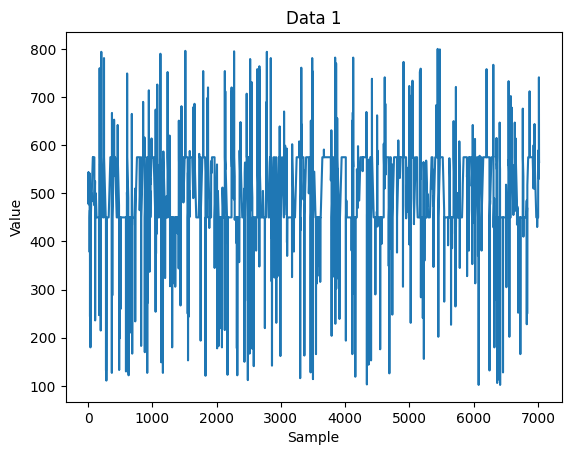

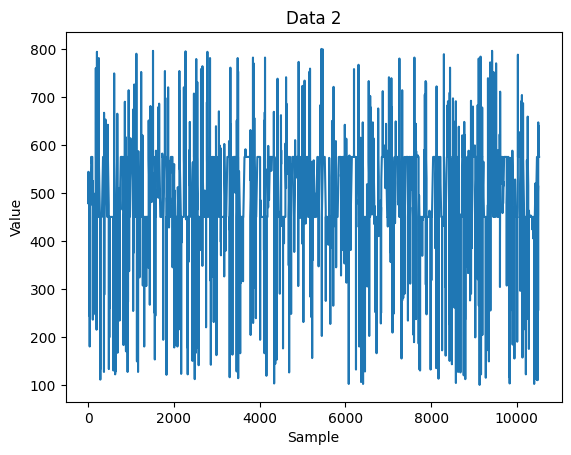

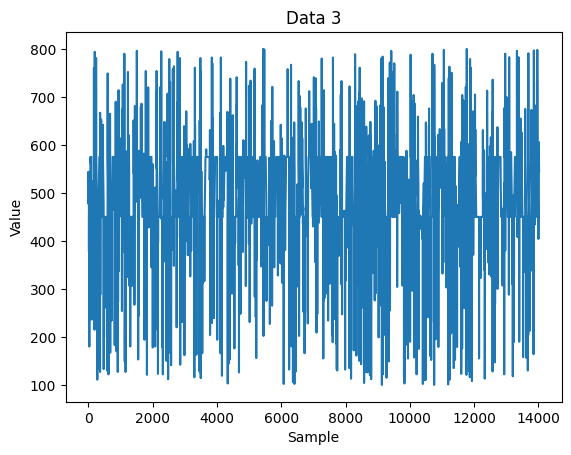

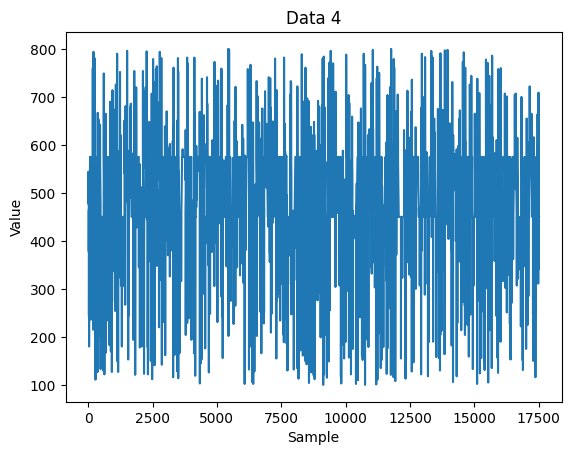

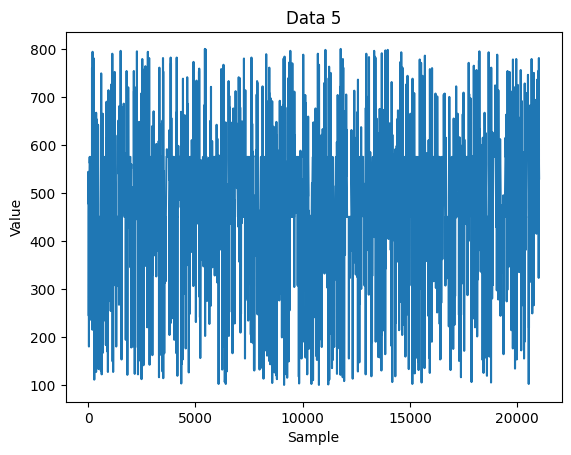

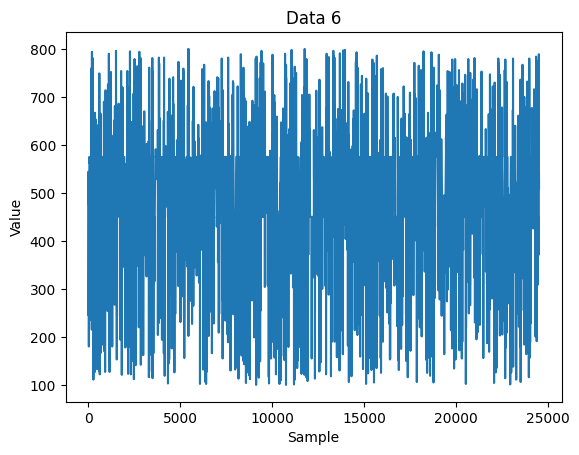

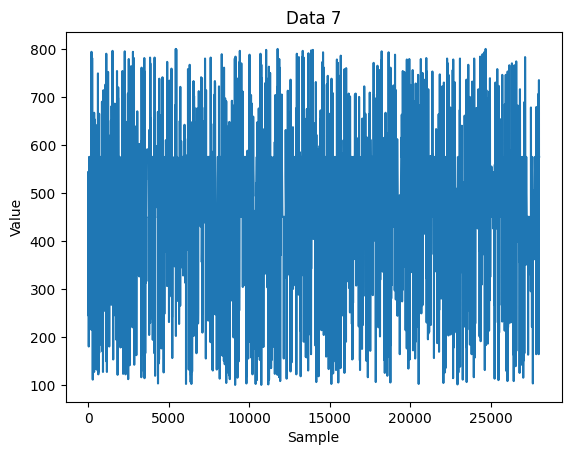

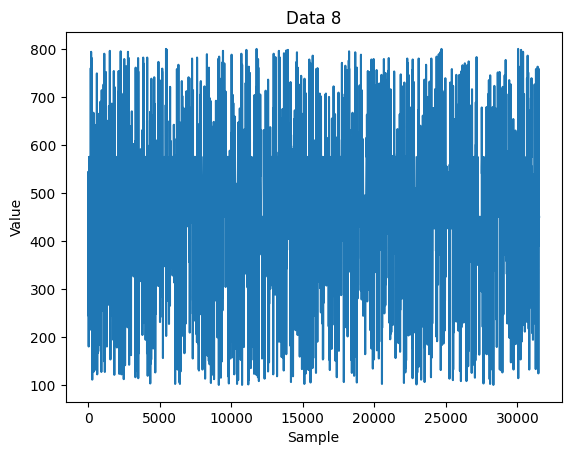

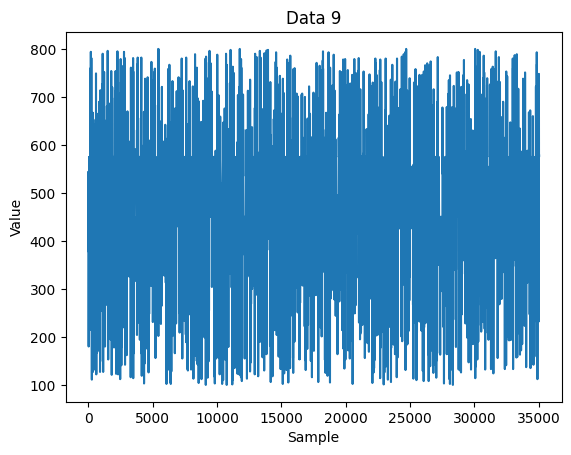

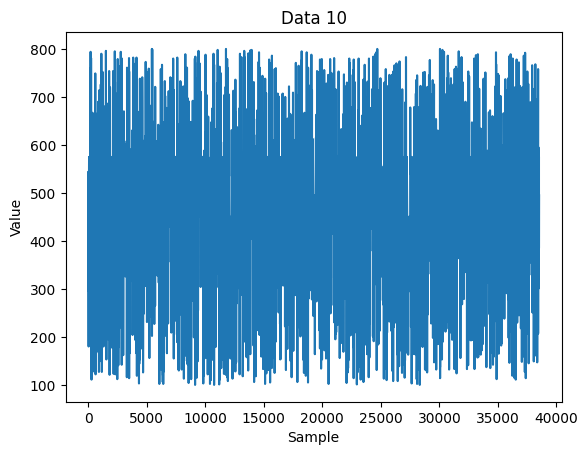

In [4]:

for i in range(1,11):
    plt.plot(eval(f"data{i}").raw([1]))  # Plotea los datos correspondientes a data{i}
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.title(f'Data {i}')
    plt.savefig(f"img_terrible/data_{i}.png")
    plt.show()